In [1]:
import os 
import sys 
import glob

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing

In [2]:
!pwd

/home/ysk2a15/mydocuments/GDP/gdp-wild-dogs


In [3]:
def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))

In [4]:
list_files(os.path.join(os.getcwd(), 'Data'))

Data/
    2020-11-16/
        cut.pkl
        raw.pkl
        cutoff.txt
        201116_807d3a2a0fe8_xyz.pkl
    2020-11-19/
        cut.pkl
        raw.pkl
        cutoff.txt
        201119_807d3a2a0fe8_xyz.pkl
    2020-11-23/
        cut.pkl
        raw.pkl
        cutoff.txt
        201123_807d3a2a0fe8_xyz.pkl
    2020-11-05/
        cut.pkl
        raw.pkl
        201105_session_xyz.pkl
        cutoff.txt
        201105_807d3a2a0fe8_xyz.pkl
        201105_session.pkl


### Only take data that is relevant for each session 
- all pkl are 24hrs long 
- ONLY interested in actual session 
    - normmally 20 mins - 60 mins long 

def session_data(date_file, start, end, to_pickle=False):
    
    files_in_session = glob.glob(os.path.join(os.getcwd(),'Data/'+date_file+'/*'))

    if len(files_in_session) > 2:
        print('Already sorted!')
        sorted_session = sorted(glob.glob(os.path.join(os.getcwd(),'Data/'+date_file+'/*session*')))
        
        '!! Assuming there is only 1 session per day'
        for pkl_ in sorted_session:
            if pkl_.endswith('_xyz.pkl'):
                df_xyz = pd.read_pickle(pkl_)
            else:
                df = pd.read_pickle(pkl_)
        
        return df, df_xyz
    
    else: 
        if type(start) != str or len(start) != 8 or type(end) != str or len(end) != 8:
            print('[START] Expected type: str, Returned type: ', type(start))
            print('[END] Expected type: str, Returned type: ', type(end))

            print('Time needs to be written in this 24hr format: HH:mm:ss')
            print('[START] Given format: ', start)
            print('[END] Given format: ', end)



        elif type(start) == str and len(start) == 8 and type(end) == str and len(end) == 8:
            start = ' '.join([date_file, start])
            end = ' '.join([date_file, end])
 
            for file in files_in_session:
                if file.endswith('_xyz.pkl'):
                    df_xyz = pd.read_pickle(file)
                    df_xyz = df_xyz.loc[pd.to_datetime(start):pd.to_datetime(end)]

                else:
                    df = pd.read_pickle(file)
                    df = df.loc[start:end]
                    
            if to_pickle == True:
                print('Saving as new pickle file...')
                df.to_pickle(os.path.join(os.getcwd(),'Data/'+date_file+'/'+''.join(date_file.split('-'))[2:]+'_session.pkl'))
                df_xyz.to_pickle(os.path.join(os.getcwd(),'Data/'+date_file+'/'+''.join(date_file.split('-'))[2:]+'_session_xyz.pkl'))

        return df, df_xyz 

### PKL file finder 

In [5]:
def pkl_path_finder(date_):
    path = os.path.join(os.getcwd(), './Data/'+date_+'/cut.pkl')
    return path

## 1. 20201105

In [6]:
date_ = '2020-11-05'

df_201105 = pd.read_pickle(pkl_path_finder(date_))
df_201105.set_index('dt', inplace=True)
df_201105

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,ms_counter,seq_counter
dt,,,,,,,,
2020-11-05 14:10:18.020000+00:00,-486,161,5,-243390,152180,103110,7192493,0
2020-11-05 14:10:18.040000+00:00,-182,274,213,-303520,109270,184800,7192513,1
2020-11-05 14:10:18.060000+00:00,9,-152,122,-179830,18970,207550,7192533,2
2020-11-05 14:10:18.080000+00:00,74,-426,208,-32340,-38080,67900,7192553,3
2020-11-05 14:10:18.100000+00:00,503,160,476,-22470,-56980,-47180,7192573,4
...,...,...,...,...,...,...,...,...
2020-11-05 14:27:58.900000+00:00,339,-851,276,-17010,-40740,59220,1053893,24
2020-11-05 14:27:58.920000+00:00,306,-449,197,-32760,-22960,92470,1053913,25
2020-11-05 14:27:58.940000+00:00,193,-87,171,-75670,-5950,122780,1053933,26


In [7]:
df_201105.describe()

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,ms_counter,seq_counter
count,51603.000000,51603.000000,51603.000000,51603.000000,51603.000000,5.160300e+04,5.160300e+04,51603.000000
mean,-593.534077,-282.372672,-607.041606,-1613.547274,-4044.129508,-5.850420e+03,5.655464e+05,24.494913
std,924.074716,738.856394,893.257968,133615.227727,106539.700871,1.288504e+05,5.078591e+05,14.426775
min,-7994.000000,-7860.000000,-7989.000000,-982590.000000,-714070.000000,-9.460500e+05,5.993000e+03,0.000000
25%,-883.000000,-656.000000,-901.000000,-62930.000000,-56280.000000,-5.950000e+04,2.839230e+05,12.000000
50%,-499.000000,-339.000000,-525.000000,-70.000000,-3640.000000,-3.360000e+03,5.419330e+05,24.000000
75%,-117.000000,67.000000,-132.000000,58170.000000,44380.000000,4.704000e+04,7.999430e+05,37.000000
max,4713.000000,7825.000000,4820.000000,912170.000000,814030.000000,1.127840e+06,7.196453e+06,49.000000


sess1 = sess1.loc['2020-11-05 14:10:18':'2020-11-05 14:27:59']

x = sess1.values
dt = sess1.index

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
x_scaled = min_max_scaler.fit_transform(x)
sess1 = pd.DataFrame(x_scaled, columns=sess1.columns)
sess1['dt'] = dt
sess1 = sess1.set_index('dt')
sess1

Text(0.5, 1.0, 'gyro_z')

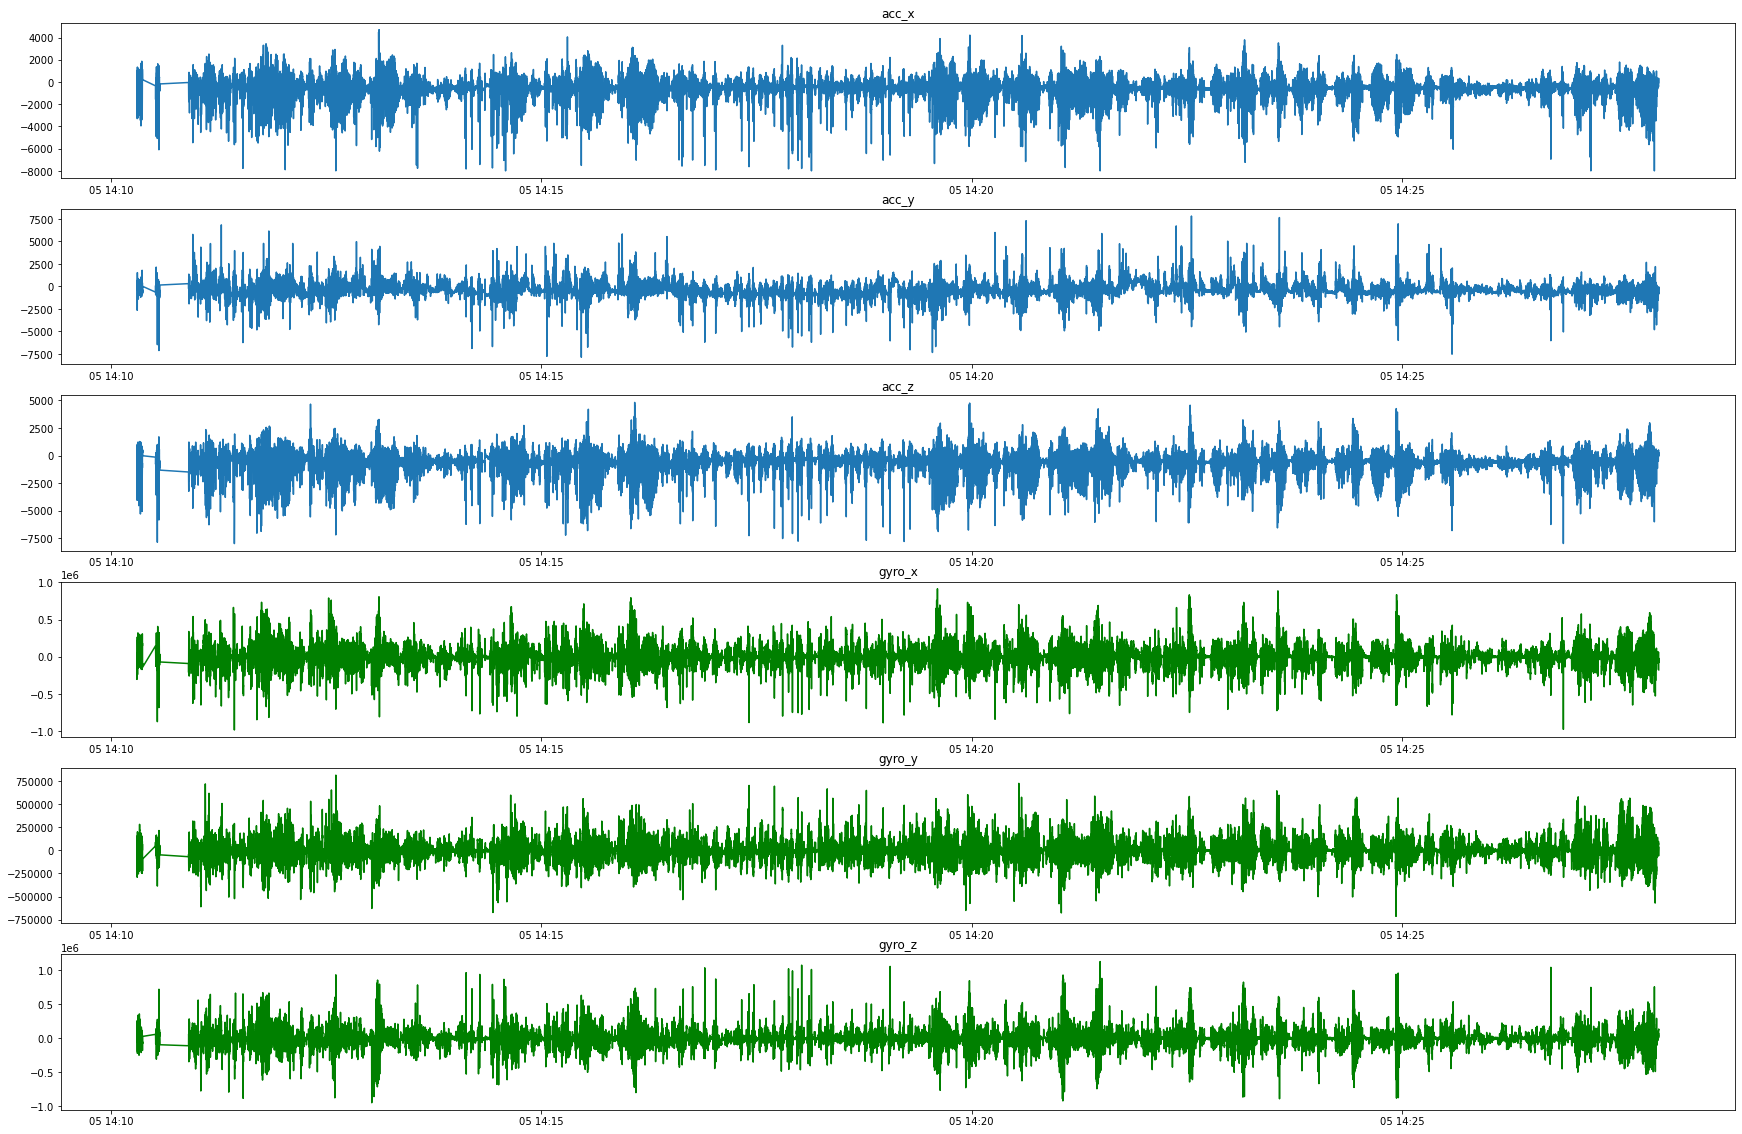

In [10]:
"Plotting data row wise"

fig, axs = plt.subplots(6, figsize=(30, 20))


'1. acc_x'
axs[0].plot(df_201105.index,df_201105['acc_x'])
axs[0].set_title('acc_x')
'2. acc_y'
axs[1].plot(df_201105.index,df_201105['acc_y'])
axs[1].set_title('acc_y')
'3. acc_x'
axs[2].plot(df_201105.index,df_201105['acc_z'])
axs[2].set_title('acc_z')

'4. gyro_x'
axs[3].plot(df_201105.index,df_201105['gyro_x'], color='g')
axs[3].set_title('gyro_x')
'5. gyro_y'
axs[4].plot(df_201105.index,df_201105['gyro_y'], color='g')
axs[4].set_title('gyro_y')
'6. gyro_z'
axs[5].plot(df_201105.index,df_201105['gyro_z'], color='g')
axs[5].set_title('gyro_z')
# plt.show()

Text(0.5, 0.92, '3D Plot of Acc XYZ')

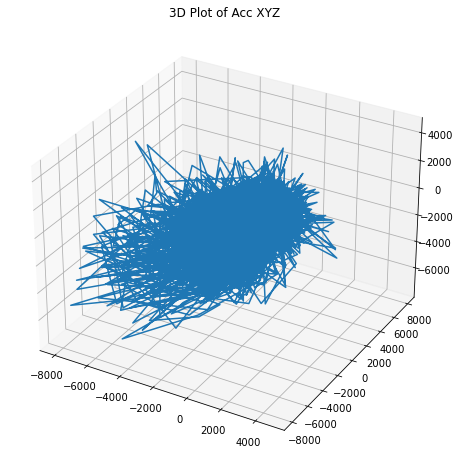

In [18]:
fig3 = plt.figure(figsize=(8,8))
ax3 = plt.axes(projection='3d')

ax3.plot3D(df_201105['acc_x'], df_201105['acc_y'], df_201105['acc_z'])
ax3.set_title('3D Plot of Acc XYZ')

Text(0.5, 0.92, '3D Plot of Gyro XYZ')

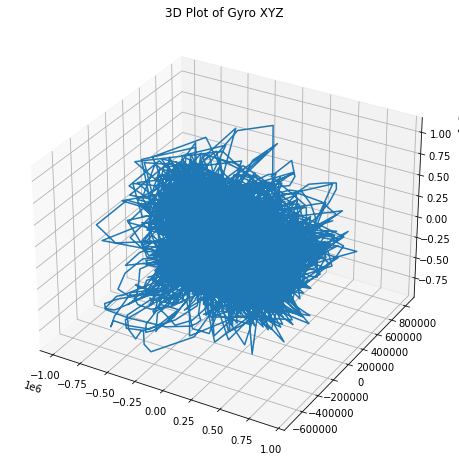

In [17]:
fig3 = plt.figure(figsize=(8,8))
ax3 = plt.axes(projection='3d')

ax3.plot3D(df_201105['gyro_x'], df_201105['gyro_y'], df_201105['gyro_z'])
ax3.set_title('3D Plot of Gyro XYZ')

## Signal Processing

- Sampling frequency = 50Hz 
- 1 sample every 0.02s
- sliding window = 125 readings/window = 2.5s (according to: https://www.analyticsinsight.net/human-activity-prediction-using-machine-learning/)

In [19]:
from scipy import signal
from scipy.fftpack import fft

In [32]:
def plot_lines(data, fs, title):
    num_rows, num_cols=data.shape
    if num_cols!=3:
        raise ValueError('Not 3D data')
    fig, ax=plt.subplots(figsize=(15,10))
    labels=['x','y','z']
    color_map=['r', 'g', 'b']
    index=np.arange(num_rows)/fs
    for i in range(num_cols):
        ax.plot(index, data[:,i], color_map[i], label=labels[i])
    ax.set_xlim([0,num_rows/fs])
    ax.set_xlabel('Time [sec]')
    ax.set_title('Time domain: '+title)
    ax.legend()

### 1. Median Filtering 
- gets the median of (kernel_size=125) samples 

In [21]:
def median_filter(data, f_size):
    lgth, num_signal=data.shape
    f_data=np.zeros([lgth, num_signal])
    for i in range(num_signal):
        f_data[:,i]=signal.medfilt(data[:,i], f_size)
    return f_data

(51603, 6)
[[   -486     161       5 -243390  152180  103110]
 [   -182     274     213 -303520  109270  184800]
 [      9    -152     122 -179830   18970  207550]
 ...
 [    193     -87     171  -75670   -5950  122780]
 [     76     -42     105 -138530   15330  136570]
 [    -70    -131     -39 -175700   31640  127330]]


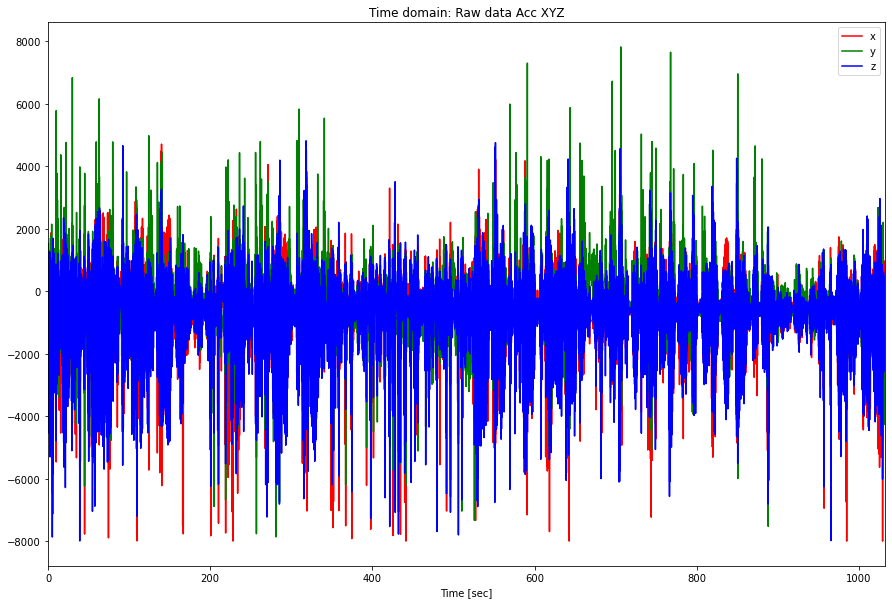

In [40]:
np_201105 = df_201105[['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']].to_numpy()
print(np_201105.shape)
print(np_201105)

fs = 50

plot_lines(np_201105[:,[0,1,2]], fs, 'Raw data Acc XYZ')

[[   0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.]
 ...
 [   0. -131.    0.    0.    0.    0.]
 [   0.  -87.    0.    0.    0.    0.]
 [   0.  -42.    0.    0.    0.    0.]]


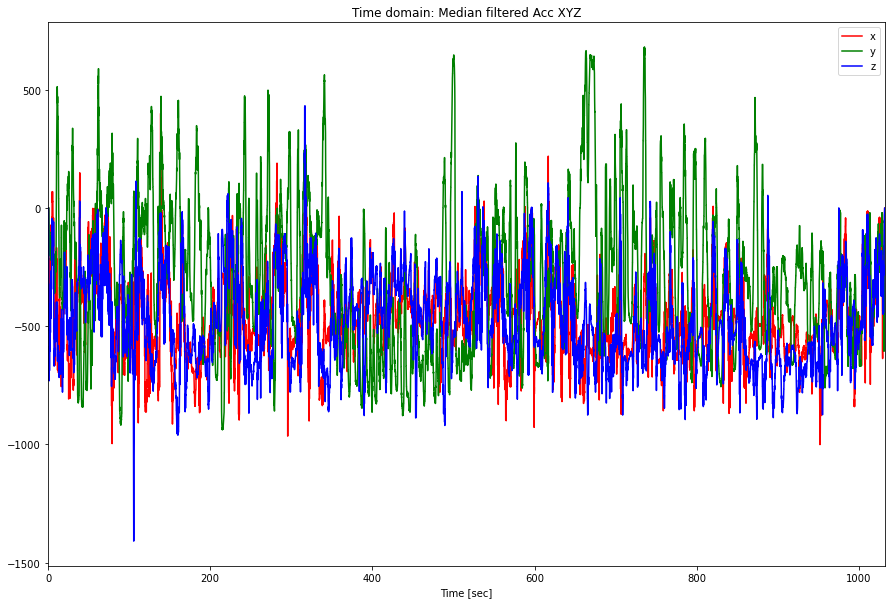

In [39]:
median_filtered = median_filter(np_201105, 125)
print(median_filtered)

plot_lines(median_filtered[:,[0,1,2]], fs, 'Median filtered Acc XYZ')

### 2. Low Pass Filter
- corner frequency = 20Hz 

In [24]:
def freq_filter(data, f_size, cutoff):
    lgth, num_signal=data.shape
    f_data=np.zeros([lgth, num_signal])
    lpf=signal.firwin(f_size, cutoff, window='hamming')
    for i in range(num_signal):
        f_data[:,i]=signal.convolve(data[:,i], lpf, mode='same')
    return f_data

[[-280.63445903  103.07403391   31.25688448]
 [-234.14120216 -101.48036744  196.33503794]
 [ -34.95373558 -141.52291168  265.97210621]
 ...
 [ 193.51049837 -214.47742358  223.68828048]
 [  76.50739195   -8.41517022  103.97636342]
 [ -15.81165936   13.42649058  -21.44407858]]


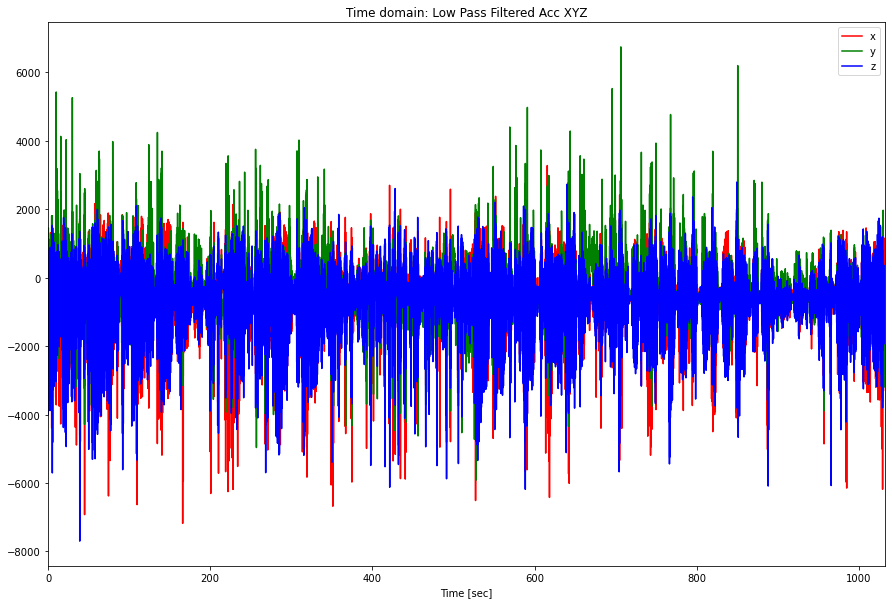

In [38]:
cutoff = 20

lpf_data = freq_filter(np_201105[:,[0,1,2]], 125, cutoff/fs)
print(lpf_data)

plot_lines(lpf_data, fs, 'Low Pass Filtered Acc XYZ')

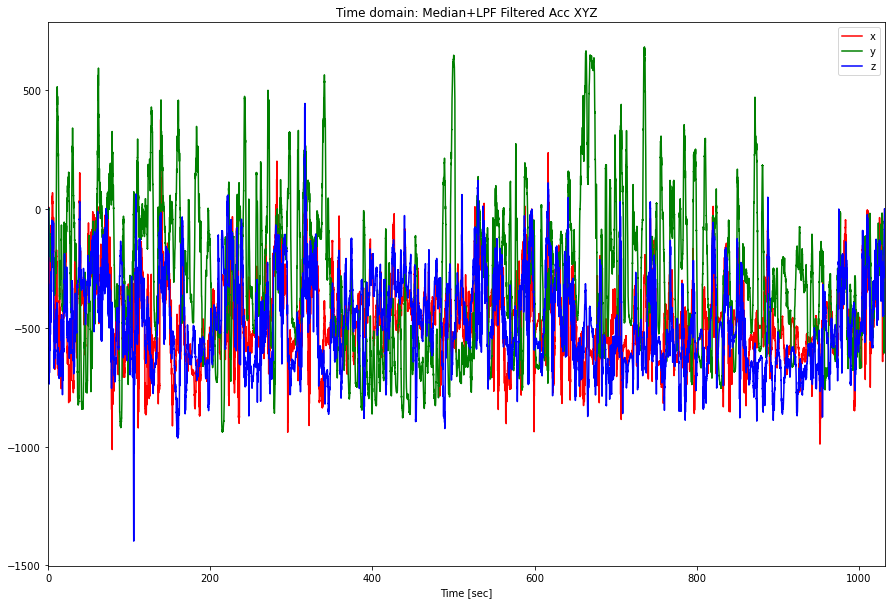

In [42]:
'Combined Data (Median+LPF)'
median_lpf_filtered = freq_filter(median_filtered, 125, cutoff/fs)
plot_lines(median_lpf_filtered[:,[0,1,2]], fs, 'Median+LPF Filtered Acc XYZ')

In [43]:
df_201105_processed = pd.DataFrame(median_lpf_filtered, columns=['tAcc-medlpf()-X', 'tAcc-medlpf()-Y', 
                                                                 'tAcc-medlpf()-Z', 'tGyro-medlpf()-X', 
                                                                 'tGyro-medlpf()-Y', 'tGyro-medlpf()-Z'])
df_201105_processed['dt'] = df_201105.index
df_201105_processed.set_index('dt', inplace=True)
df_201105_processed

,tAcc-medlpf()-X,tAcc-medlpf()-Y,tAcc-medlpf()-Z,tGyro-medlpf()-X,tGyro-medlpf()-Y,tGyro-medlpf()-Z
dt,,,,,,
2020-11-05 14:10:18.020000+00:00,-0.289970,-0.007287,-0.081167,5.444407,4.649233,4.074461
2020-11-05 14:10:18.040000+00:00,-0.285049,-0.012318,-1.089395,59.385039,5.652826,29.186805
2020-11-05 14:10:18.060000+00:00,-0.036810,-0.049942,-0.962307,54.285633,23.262738,30.921432
2020-11-05 14:10:18.080000+00:00,0.117661,-0.070580,0.279050,-12.209176,33.998750,1.262504
2020-11-05 14:10:18.100000+00:00,-0.086000,-0.039358,0.941637,-50.640754,20.358174,-21.433342
...,...,...,...,...,...,...
2020-11-05 14:27:58.900000+00:00,-0.096955,-268.119439,-0.110684,-0.987093,-6.087061,-4.202509
2020-11-05 14:27:58.920000+00:00,-0.118374,-187.671107,-0.199997,-0.483551,-3.769920,-10.008679
2020-11-05 14:27:58.940000+00:00,-0.125650,-121.431616,-0.106412,-1.786007,-2.614098,-9.697707


In [44]:
df_201105_processed.describe()

,tAcc-medlpf()-X,tAcc-medlpf()-Y,tAcc-medlpf()-Z,tGyro-medlpf()-X,tGyro-medlpf()-Y,tGyro-medlpf()-Z
count,51603.000000,51603.000000,51603.000000,51603.000000,51603.000000,51603.000000
mean,-457.161286,-290.264946,-473.779718,-597.509532,-6214.283252,-6366.819074
std,175.537811,305.368214,191.685045,28173.055962,21536.505818,29539.112825
min,-1012.139599,-938.424960,-1397.672576,-148765.066209,-157391.512161,-161435.617130
25%,-578.467980,-524.753268,-623.524089,-16222.898850,-16739.024130,-19354.627063
50%,-479.955349,-298.977316,-501.837672,-719.466538,-3203.977550,-2152.369638
75%,-349.121108,-99.988939,-331.094356,14034.533208,5950.077213,9414.812237
max,377.415575,683.037850,444.991328,179095.703779,69076.880875,109627.913556


In [47]:
'3D plots of filtered data'
def plot3D(data, title):
    fig=plt.figure(figsize=(8,8))
    ax=fig.add_subplot(111, projection='3d')
    ax.plot(xs=data[:,0], ys=data[:,1], zs=data[:,2], zdir='z')
    ax.set_title(title)

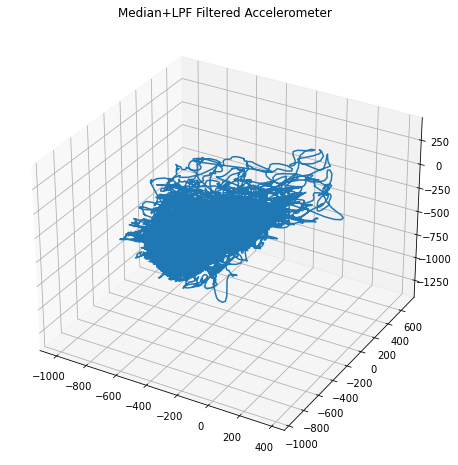

In [48]:
np_medlpf_201105 = df_201105_processed.to_numpy()

plot3D(np_medlpf_201105[:,[0,1,2]], 'Median+LPF Filtered Accelerometer')

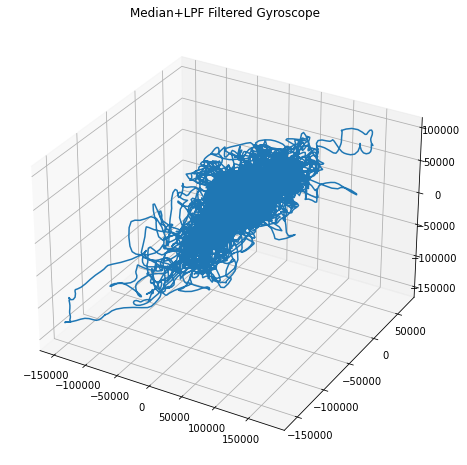

In [50]:
plot3D(np_medlpf_201105[:,[3,4,5]], 'Median+LPF Filtered Gyroscope')

### 3. Fast Fourier Transform 
- converting from time domain to frequency domain

In [54]:
def fft_plot(data, fs, title):
    lgth, num_signal=data.shape
    fqy=np.zeros([lgth,num_signal])
    fqy[:,0]=np.abs(fft(data[:,0]))
    fqy[:,1]=np.abs(fft(data[:,1]))
    fqy[:,2]=np.abs(fft(data[:,2]))
    index=np.arange(int(lgth/2))/(int(lgth/2)/(fs/2))
    fig, ax=plt.subplots(figsize=(15,10))
    labels=['x','y','z']
    color_map=['r', 'g', 'b']
    for i in range(3):
        ax.plot(index, fqy[0:int(lgth/2),i], color_map[i], label=labels[i])
    ax.set_xlim([0, fs/2])
    ax.set_xlabel('Hz')
    ax.set_title('Frequency spectrum: '+title) 
    ax.legend()

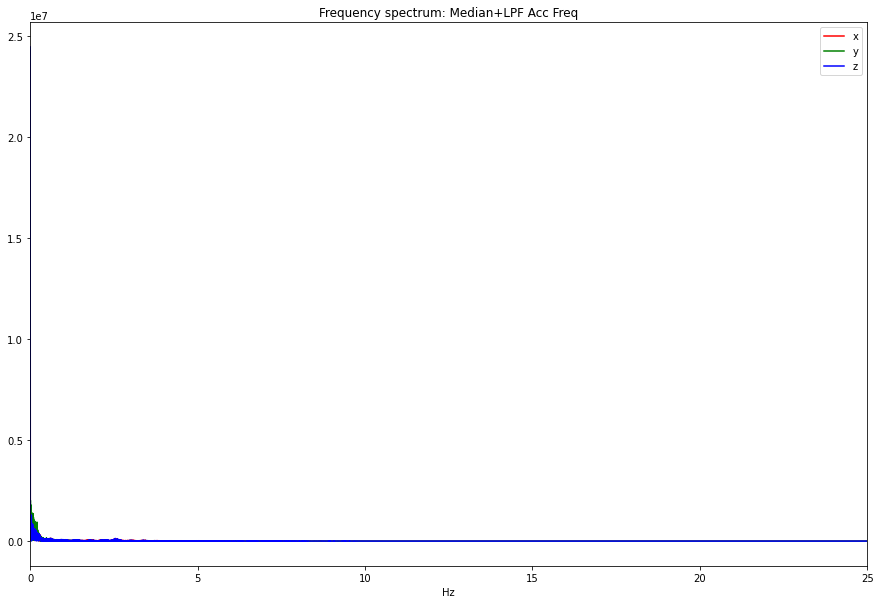

In [55]:
fft_plot(np_medlpf_201105[:,[0,1,2]], fs, 'Median+LPF Acc Freq')

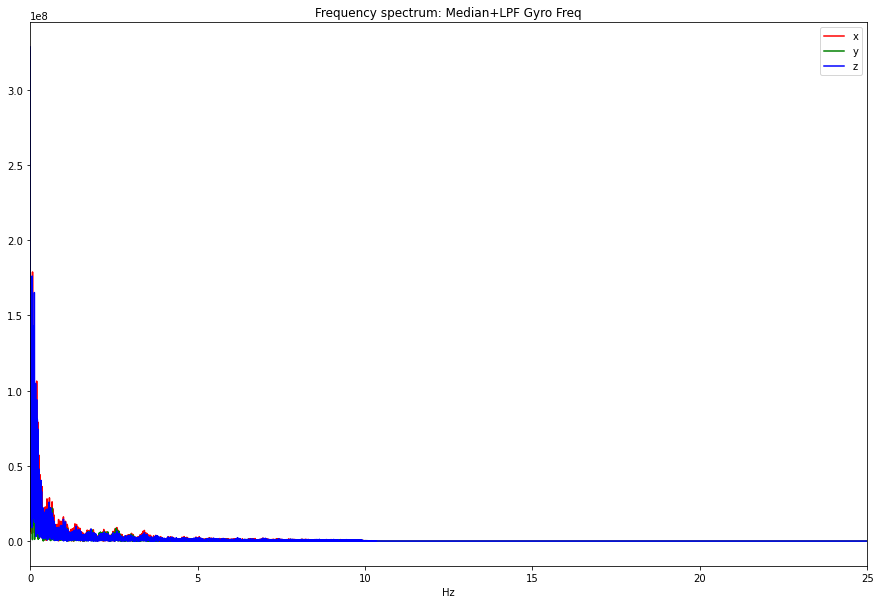

In [57]:
fft_plot(np_medlpf_201105[:,[3,4,5]], fs, 'Median+LPF Gyro Freq')